In [4]:
import pandas as pd
import os

In [5]:
os.chdir("C:\\Users\\ASUS\\Downloads")

In [26]:
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
df.drop(['PassengerId', 'Name', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'SibSp'], axis = 'columns', inplace= True)

In [28]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [29]:
target = df.Survived
features = df.drop('Survived', axis = 'columns')

In [30]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [31]:
features

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [32]:
features['Sex'] = features['Sex'].map({'male':0, 'female':1})

In [33]:
features

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500
...,...,...,...,...
886,2,0,27.0,13.0000
887,1,1,19.0,30.0000
888,3,1,NaN,23.4500
889,1,0,26.0,30.0000


In [34]:
import seaborn as sns

<Axes: >

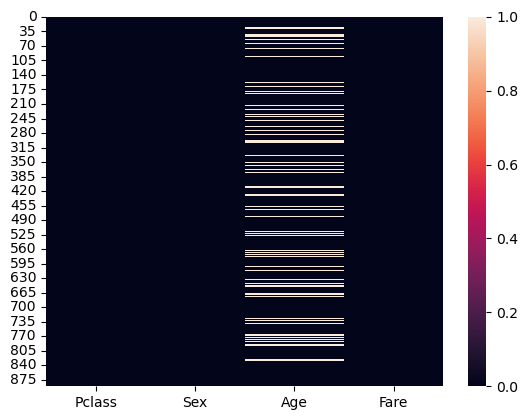

In [36]:
sns.heatmap(features.isnull())

In [37]:
features.Age = features.Age.fillna(features.Age.mean())
features.head()

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500


<Axes: >

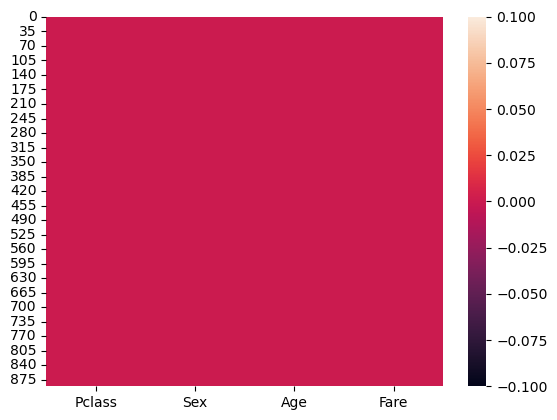

In [38]:
sns.heatmap(features.isnull())

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.36)

In [41]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [42]:
model.fit(x_train, y_train)

GaussianNB()

In [43]:
model.score(x_test, y_test)

0.7850467289719626

In [44]:
x_test[:10]

,Pclass,Sex,Age,Fare
211,2,1,35.000000,21.0000
818,3,0,43.000000,6.4500
272,2,1,41.000000,19.5000
783,3,0,29.699118,23.4500
252,1,0,62.000000,26.5500
526,2,1,50.000000,10.5000
188,3,0,40.000000,15.5000
464,3,0,29.699118,8.0500
127,3,0,24.000000,7.1417
604,1,0,35.000000,26.5500


In [45]:
y_test[:10]

211    1
818    0
272    1
783    0
252    0
526    1
188    0
464    0
127    1
604    1
Name: Survived, dtype: int64

In [46]:
model.predict(x_test[:10])

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [47]:
model.predict_proba(x_test[:10])

array([[0.22618485, 0.77381515],
       [0.96348877, 0.03651123],
       [0.23658712, 0.76341288],
       [0.95934839, 0.04065161],
       [0.81310518, 0.18689482],
       [0.24715249, 0.75284751],
       [0.96375051, 0.03624949],
       [0.95917574, 0.04082426],
       [0.95623521, 0.04376479],
       [0.78514826, 0.21485174]])